In [1]:
import pandas as pd
from urllib.request import urlretrieve

In [2]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [3]:
urlretrieve(URL, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x1372964f7b8>)

In [4]:
data = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)  #==>make index as timestamp

In [5]:
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [6]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('seaborn')

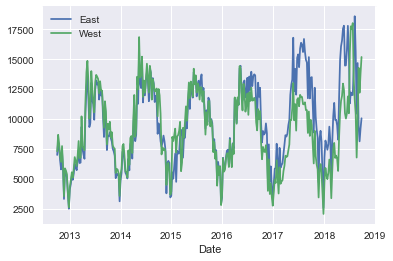

In [7]:
data.columns = ['East', 'West']
data.resample('w').sum().plot()   #'y'/'m'/'w'/'d'/'h'

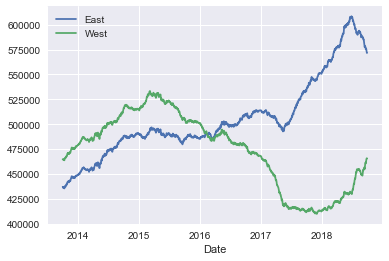

In [8]:
#This will show day with the previous 365 days sum
data.resample('d').sum().rolling(365).sum().plot()   #'y'/'m'/'w'/'d'/'h'

(0, 618365.35)

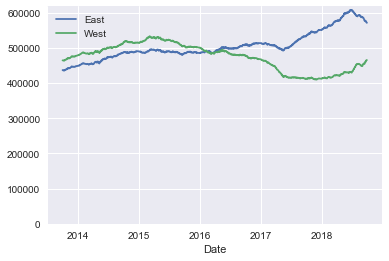

In [9]:
#since the y_axes is not from 0, so in order to view the whole story, I want to reset my y.
ax = data.resample('d').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)


(0, 1080850.45)

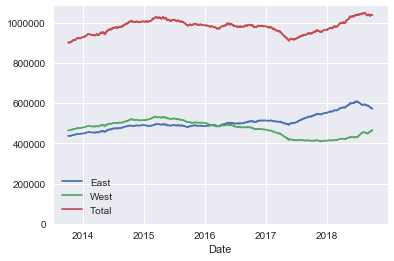

In [10]:
# Now I want to see the total.
data['Total'] =data['West'] + data['East']

ax = data.resample('d').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

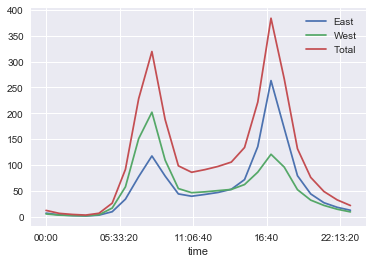

In [11]:
# see the trend for individual days of hours
data.groupby(data.index.time).mean().plot()


In [12]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)

In [13]:
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


In [14]:
# pivoted.plot()   #==> LOLOLOL!!! my lengend is my columns!

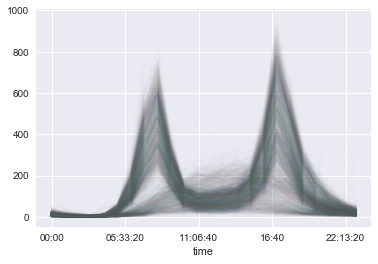

In [15]:
pivoted.plot(legend=False, alpha=0.01)

# we can see there are two patterns. The best hypothese is one is during the weekdays, another is for weekends.